# Exploring American Time Use Survey

#### I am curious about how people spend their time on a daily basis. I wanted to explore some questions. 

### Outline of this notebook:
 1. age and sleep 
 2. age and sleep related because of employment?
 3. age and sleep curvilinear relationship
 4. Summary & Future Direction
 

### 1. Import necessary libraries

In [3]:
import json
import datetime
import scipy.stats
import pandas as pd
import numpy as np



# plotting
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# other

from scipy.stats import ttest_ind, ttest_ind_from_stats

### 2. Read in data atussum (ATUS summary data 2003-2015)

In [5]:
atussum = pd.read_csv("C:/SQL2019/atussum.csv")
atussum.head(5)

,gemetsta,peeduca,pehspnon,teage,telfs,temjot,teschenr,teschlvl,tesex,tespempnot,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
0,1,44,2,60,2,2,-1,-1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,2,40,2,41,1,2,2,-1,2,1,...,0,0,0,0,0,0,0,0,0,0
2,1,41,2,26,2,2,2,-1,2,2,...,0,0,0,0,0,0,0,0,0,0
3,2,39,2,36,4,-1,2,-1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,2,45,2,51,1,2,-1,-1,1,2,...,0,0,0,0,0,0,0,0,0,0


Change t010101 to column name sleep and create sleep.hr (sleep in hour) 

In [6]:
atussum['sleep']= atussum['t010101']
atussum['sleep'].head(5)

0    870
1    620
2    560
3    720
4    385
Name: sleep, dtype: int64

In [7]:
atussum['sleep.hr'] = atussum['t010101']/60
atussum['sleep.hr'].head(5)

0    14.500000
1    10.333333
2     9.333333
3    12.000000
4     6.416667
Name: sleep.hr, dtype: float64

Change teage to column name age

In [17]:
atussum['age'] = atussum['teage']
atussum.columns

Index(['gemetsta', 'peeduca', 'pehspnon', 'teage', 'telfs', 'temjot',
       'teschenr', 'teschlvl', 'tesex', 'tespempnot',
       ...
       't500101', 't500103', 't500104', 't500105', 't500106', 't500107',
       't509989', 'sleep', 'sleep.hr', 'age'],
      dtype='object', length=361)

To perform any analyses or plot data, we need to convert steps column into a numeric type. Otherwise we get errors.

In [13]:
atussum['teage'] = pd.to_numeric(atussum['teage'])
atussum['sleep'] = pd.to_numeric(atussum['sleep'])
atussum['sleep.hr'] = pd.to_numeric(atussum['sleep.hr'])

### Visualize the Sleep and Age Data

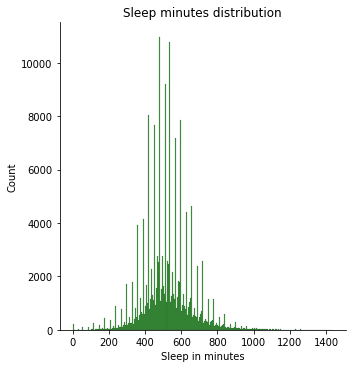

In [9]:
sns.displot(atussum['sleep'], color="green")
plt.title("Sleep minutes distribution")
plt.xlabel("Sleep in minutes")
plt.show()

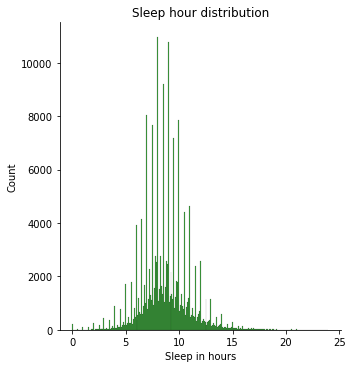

In [10]:
sns.displot(atussum['sleep.hr'], color="green")
plt.title("Sleep hour distribution")
plt.xlabel("Sleep in hours")
plt.show()

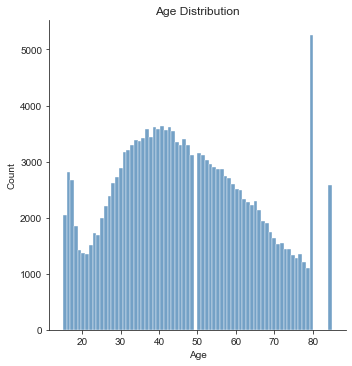

In [14]:
sns.set_style("ticks")
sns.displot(atussum['teage'], color = 'steelblue')
plt.title("Age Distribution")
plt.xlabel("Age") 
plt.show()

## Question 1: Does the amount of sleep decrease with age? 

#Linear Regression Model (sleep regressed on age) 

First make data clean. Remove null data (negative values).

In [181]:
atussum['sleep'] = atussum['sleep'][atussum['sleep']>0]
atussum['telfs'] = atussum['telfs'][atussum['telfs']>0]
atussum['sleep'] =atussum['sleep'].fillna(atussum['sleep'].mean()) 
atussum['sleep'].isna().sum()

0

r_value -0.04876305653269557
p_value 1.9047892898988343e-90
standard deviation 0.018615771596862906


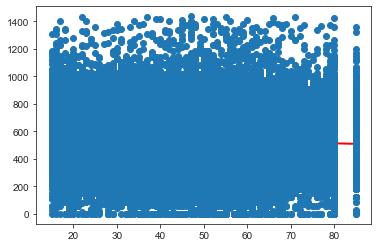

In [19]:
from numpy import arange,array,ones 
from pylab import plot,show
from scipy import stats


x = atussum['teage']
y = atussum['sleep']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print('r_value', r_value)
print('p_value', p_value)
 
pd.options.display.float_format = '{:.5f}'.format
pd.reset_option('display.float_format')
print('standard deviation', std_err)

line = slope*x+intercept
plot(x,line,'r-',x,y,'o')
show()




Results show that age is negatively correlated with the amount of sleep (r = -0.05), statistically significant < 0.001. 
But the scatterplot shows that this relationship might not be linear.  

## Question 2. Does the relationship above hold when 'labour force state' is related to sleep as well?

People might sleep less as they get older, because of their working hours. I tried multiple regression. But due to multicollinearity, we cannot fit age and lfs(labour force state) in the same model. 

Below is the relationship between sleep amount and labour force state. 

r_value 0.1412918685451525
p_value 0.0
standard deviation 0.17476091153213294


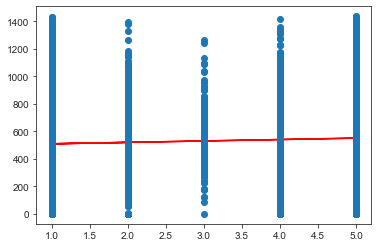

In [21]:
x = atussum['telfs']
y = atussum['sleep']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print('r_value', r_value)
print('p_value', p_value)
 
pd.options.display.float_format = '{:.5f}'.format
pd.reset_option('display.float_format')
print('standard deviation', std_err)

line = slope*x+intercept
plot(x,line,'r-',x,y,'o')
show()


In [ ]:
#Question 3:  Does the amount of sleep decrease with age? (U-shape regression) Quadratic regression model? 
# Checking a curvilinear relationship between age and sleep.

         2
0.05573 x - 5.795 x + 656.3


{'r_squared': 0.02177440987968415}

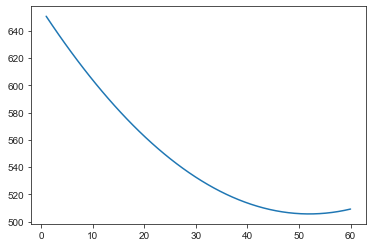

In [24]:
#polynomial fit with degree = 2

modelp = np.poly1d(np.polyfit(atussum['teage'],atussum['sleep'],2))

#add fitted polynomical line to scatterplot
polyline = np.linspace(1,60,50)
plt.plot(polyline, modelp(polyline))
print(modelp)

#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#find r-squared of polynomial model with degree = 3
polyfit(atussum['teage'], atussum['sleep'], 2)


## Summary 

The main goal was to find a relationship between age and sleeping time (+ practice python).
There seems to be a relationship. People sleep less as they age (especially in their mid-age).
From this analysis alone, however, I was not able to draw any conclusion. More research + studying needs to be done.. 